In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Using Excel: create copy of Spend column: Spend2. many of Spend2 values are times or dates. 
# So I changed data type of Spend2 column into number. But that still leaves 402 rows with timestamp data
# Removed 402 rows: 101666 rows remaining

In [136]:
# Ad formats that were no lock campaign were changed to Carousel if 
# Creative - Family value was Carousel

In [137]:
# Import modified dataset
creative_cleaned = pd.read_excel('Change 2022 Creative Data writeback_091122_Cleaned.xlsx')
creative_cleaned

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend2
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101661,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.10
101662,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.17
101663,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.14
101664,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.58


In [138]:
# Confirm data type of Spend2 is float. Also check for null values.
print(creative_cleaned.dtypes)
print(creative_cleaned.info())

Requested URL Path                 object
Campaign                           object
Ad Format                          object
Clicks                            float64
Spend                              object
Creative - Size                    object
Date                       datetime64[ns]
Impressions                         int64
Reach                             float64
Audience                           object
Platform                           object
Creative - Family                  object
Creative - Version                 object
100% Video Views                  float64
Video Starts                      float64
Follows                           float64
Days away from max date             int64
Latest report?                      int64
CTR                               float64
CTR Score                         float64
Weighted CTR Score                float64
Spend2                            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101666 entri

These columns have too many missing values and should not be used in analysis: Requested URL Path

In [139]:
# Identify any missing values using df.isna() function.
creative_na = creative_cleaned[creative_cleaned.isna().any(axis=1)]

# Use shape method to identify number of missing values.
creative_na.shape

(101666, 22)

Missing value columns to rectify:
Campaign: Have No Answer value
Ad Format: Have No Answer value
Clicks: Replace with 0, anomalous data point?
Spend: Change to float
Creative size: Have No Answer value
Reach: Replace with 0
Audience: Have No Answer value
Creative Version: Have No Answer value
Creative Family: Have No Answer value
CTR columns: Replace with 0

In [140]:
creative_cleaned['Clicks'].fillna(0, inplace = True)
creative_cleaned['Reach'].fillna(0, inplace = True)
creative_cleaned['100% Video Views'].fillna(0, inplace = True)
creative_cleaned['Video Starts'].fillna(0, inplace = True)
creative_cleaned['Follows'].fillna(0, inplace = True)
creative_cleaned['CTR'].fillna(0, inplace = True)
creative_cleaned['CTR Score'].fillna(0, inplace = True)
creative_cleaned['Weighted CTR Score'].fillna(0, inplace = True)
print(creative_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101666 entries, 0 to 101665
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Requested URL Path       14205 non-null   object        
 1   Campaign                 101594 non-null  object        
 2   Ad Format                101595 non-null  object        
 3   Clicks                   101666 non-null  float64       
 4   Spend                    101666 non-null  object        
 5   Creative - Size          73119 non-null   object        
 6   Date                     101666 non-null  datetime64[ns]
 7   Impressions              101666 non-null  int64         
 8   Reach                    101666 non-null  float64       
 9   Audience                 101625 non-null  object        
 10  Platform                 101666 non-null  object        
 11  Creative - Family        100783 non-null  object        
 12  Creative - Versi

In [141]:
creative_cleaned['Clicks'] = creative_cleaned['Clicks'].astype(int)
creative_cleaned.dtypes

Requested URL Path                 object
Campaign                           object
Ad Format                          object
Clicks                              int64
Spend                              object
Creative - Size                    object
Date                       datetime64[ns]
Impressions                         int64
Reach                             float64
Audience                           object
Platform                           object
Creative - Family                  object
Creative - Version                 object
100% Video Views                  float64
Video Starts                      float64
Follows                           float64
Days away from max date             int64
Latest report?                      int64
CTR                               float64
CTR Score                         float64
Weighted CTR Score                float64
Spend2                            float64
dtype: object

In [142]:
creative_cleaned['Campaign'].fillna('No Answer', inplace = True)
creative_cleaned['Ad Format'].fillna('No Answer', inplace = True)
creative_cleaned['Creative - Size'].fillna('No Answer', inplace = True)
creative_cleaned['Audience'].fillna('No Answer', inplace = True)
creative_cleaned['Creative - Family'].fillna('No Answer', inplace = True)
creative_cleaned['Creative - Version'].fillna('No Answer', inplace = True)
print(creative_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101666 entries, 0 to 101665
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Requested URL Path       14205 non-null   object        
 1   Campaign                 101666 non-null  object        
 2   Ad Format                101666 non-null  object        
 3   Clicks                   101666 non-null  int64         
 4   Spend                    101666 non-null  object        
 5   Creative - Size          101666 non-null  object        
 6   Date                     101666 non-null  datetime64[ns]
 7   Impressions              101666 non-null  int64         
 8   Reach                    101666 non-null  float64       
 9   Audience                 101666 non-null  object        
 10  Platform                 101666 non-null  object        
 11  Creative - Family        101666 non-null  object        
 12  Creative - Versi

In [143]:
creative_cleaned.drop(['Requested URL Path', 'Days away from max date', 
                       'Latest report?'], axis=1, inplace=True)
creative_cleaned.columns

Index(['Campaign', 'Ad Format', 'Clicks', 'Spend', 'Creative - Size', 'Date',
       'Impressions', 'Reach', 'Audience', 'Platform', 'Creative - Family',
       'Creative - Version', '100% Video Views', 'Video Starts', 'Follows',
       'CTR', 'CTR Score', 'Weighted CTR Score', 'Spend2'],
      dtype='object')

In [144]:
creative_cleaned.describe()

,Clicks,Impressions,Reach,100% Video Views,Video Starts,Follows,CTR,CTR Score,Weighted CTR Score,Spend2
count,101666.000000,101666.000000,101666.000000,101666.000000,101666.000000,101666.000000,101666.000000,101666.000000,101666.000000,101666.000000
mean,0.664263,463.570053,144.576801,24.197382,37.498072,0.004731,0.012344,0.471500,244.892206,7.250597
std,3.335723,1565.829607,535.137963,225.873635,339.235229,0.141749,0.083078,0.410848,907.522832,42.186228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101181
50%,0.000000,54.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.500000,14.500000,0.593047
75%,0.000000,285.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.500000,137.500000,3.220656
max,573.000000,59784.000000,16601.000000,14173.000000,19635.000000,11.000000,2.000000,1.500000,82870.500000,3642.180000


In [17]:
# Round the below columns to 2 decmial places for consistency 
# Also: Spend logically can't be more than 2 decimal places.
#decimals = 2
#creative_cleaned4['Spend2'] = creative_cleaned4['Spend2'].apply(lambda x: round(x, decimals))
#creative_cleaned4['CTR'] = creative_cleaned4['CTR'].apply(lambda x: round(x, decimals))
#creative_cleaned4['CTR Score'] = creative_cleaned4['CTR Score'].apply(lambda x: round(x, decimals))
#creative_cleaned4['Weighted CTR Score'] = creative_cleaned4['Weighted CTR Score'].apply(lambda x: round(x, decimals))
#creative_cleaned4.describe()

/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/1373136962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creative_cleaned4['Spend2'] = creative_cleaned4['Spend2'].apply(lambda x: round(x, decimals))
/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/1373136962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creative_cleaned4['CTR'] = creative_cleaned4['CTR'].apply(lambda x: round(x, decimals))
/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/137313696

,Clicks,Impressions,Reach,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend2
count,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000
mean,0.585356,505.064169,157.962247,26.437663,40.969780,0.005169,109.975003,0.048866,0.002101,0.515121,266.502993,7.787150
std,2.321076,1620.017822,557.469217,235.972957,354.391018,0.148158,61.769383,0.215588,0.014853,0.402394,904.325837,42.395824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.500000,1.500000,0.150000
50%,0.000000,70.000000,11.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.500000,20.500000,0.700000
75%,0.000000,327.000000,72.000000,0.000000,0.000000,0.000000,165.000000,0.000000,0.000000,0.500000,164.500000,3.590000
max,113.000000,59784.000000,16601.000000,14173.000000,19635.000000,11.000000,219.000000,1.000000,1.000000,1.500000,40845.000000,2706.460000


In [146]:
creative_cleaned.columns

Index(['Campaign', 'Ad Format', 'Clicks', 'Spend', 'Creative - Size', 'Date',
       'Impressions', 'Reach', 'Audience', 'Platform', 'Creative - Family',
       'Creative - Version', '100% Video Views', 'Video Starts', 'Follows',
       'CTR', 'CTR Score', 'Weighted CTR Score', 'Spend2'],
      dtype='object')

In [147]:
creative_cleaned.rename(columns = {'Ad Format':'ad_format', 
                                   'Creative - Size':'creative_size', 
                                   'Creative - Family':'creative_family', 
                                   'Creative - Version':'creative_version', 
                                   '100% Video Views':'100%_video_views', 
                                   'Video Starts':'video_starts', 
                                   'CTR Score':'CTR_score', 
                                   'Weighted CTR Score':'weighted_CTR_score'}, 
                        inplace = True)
creative_cleaned.columns

Index(['Campaign', 'ad_format', 'Clicks', 'Spend', 'creative_size', 'Date',
       'Impressions', 'Reach', 'Audience', 'Platform', 'creative_family',
       'creative_version', '100%_video_views', 'video_starts', 'Follows',
       'CTR', 'CTR_score', 'weighted_CTR_score', 'Spend2'],
      dtype='object')

In [148]:
creative_cleaned

,Campaign,ad_format,Clicks,Spend,creative_size,Date,Impressions,Reach,Audience,Platform,creative_family,creative_version,100%_video_views,video_starts,Follows,CTR,CTR_score,weighted_CTR_score,Spend2
0,FY22,Single image,0,0.26,No Answer,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.26
1,FY22,Single image,0,0.15,No Answer,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.15
2,FY22,Single image,0,0.38,No Answer,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.38
3,FY22,Single image,0,0.19,No Answer,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.19
4,FY22,Single image,1,3.62,No Answer,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,0.0,0.0,0.0,0.004049,0.0,0.0,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101661,ESPN,TV,0,0.1,No Answer,2022-05-01,3,3.0,General Targetting,OTT,CloserTwins,15s,0.0,0.0,0.0,0.000000,0.0,0.0,0.10
101662,MTV,TV,0,0.17,No Answer,2022-05-01,5,5.0,General Targetting,OTT,CloserTwins,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.17
101663,Food Network,TV,0,0.14,No Answer,2022-05-01,4,4.0,General Targetting,OTT,CloserTwins,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.14
101664,Nat Geo TV,TV,0,0.58,No Answer,2022-05-01,17,16.0,General Targetting,OTT,CloserTwins,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.58


In [149]:
creative_cleaned.Audience.value_counts()

General Targetting    21683
4                     20574
1                     16472
3                     15996
5                     14339
2                     12559
No Answer                41
Domain Targeting          2
Name: Audience, dtype: int64

In [150]:
creative_cleaned['Target_Group'] = creative_cleaned.Audience.map({'1':1, '2':1,
                                                                  '3':1, '4':2,
                                                                  '5':2, 'General Targetting':3})
creative_cleaned

,Campaign,ad_format,Clicks,Spend,creative_size,Date,Impressions,Reach,Audience,Platform,creative_family,creative_version,100%_video_views,video_starts,Follows,CTR,CTR_score,weighted_CTR_score,Spend2,Target_Group
0,FY22,Single image,0,0.26,No Answer,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.26,1.0
1,FY22,Single image,0,0.15,No Answer,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.15,1.0
2,FY22,Single image,0,0.38,No Answer,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.38,1.0
3,FY22,Single image,0,0.19,No Answer,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.19,1.0
4,FY22,Single image,1,3.62,No Answer,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,0.0,0.0,0.0,0.004049,0.0,0.0,3.62,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101661,ESPN,TV,0,0.1,No Answer,2022-05-01,3,3.0,General Targetting,OTT,CloserTwins,15s,0.0,0.0,0.0,0.000000,0.0,0.0,0.10,3.0
101662,MTV,TV,0,0.17,No Answer,2022-05-01,5,5.0,General Targetting,OTT,CloserTwins,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.17,3.0
101663,Food Network,TV,0,0.14,No Answer,2022-05-01,4,4.0,General Targetting,OTT,CloserTwins,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.14,3.0
101664,Nat Geo TV,TV,0,0.58,No Answer,2022-05-01,17,16.0,General Targetting,OTT,CloserTwins,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.58,3.0


In [151]:
creative_cleaned.Target_Group.value_counts()

1.0    45027
2.0    34913
3.0    21683
Name: Target_Group, dtype: int64

Ignore Domain Targeting: only 2 values, and there's no additional info about which audience was the target.

<AxesSubplot:xlabel='weighted_CTR_score', ylabel='Platform'>

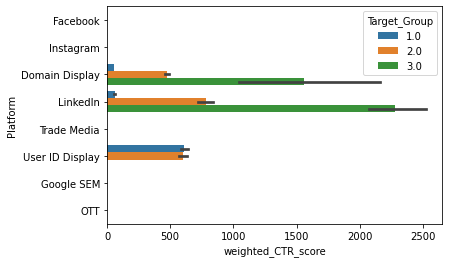

In [152]:
sns.barplot(data=creative_cleaned, x='weighted_CTR_score', y='Platform', 
            hue='Target_Group', estimator = np.mean)

<AxesSubplot:xlabel='Spend2', ylabel='weighted_CTR_score'>

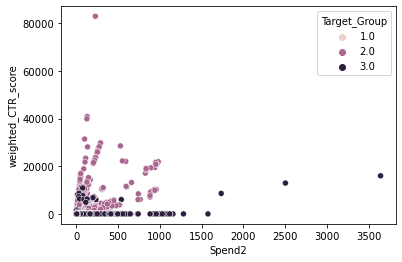

In [153]:
sns.scatterplot(data=creative_cleaned, x="Spend2", y="weighted_CTR_score", hue='Target_Group')

<AxesSubplot:xlabel='Spend2', ylabel='weighted_CTR_score'>

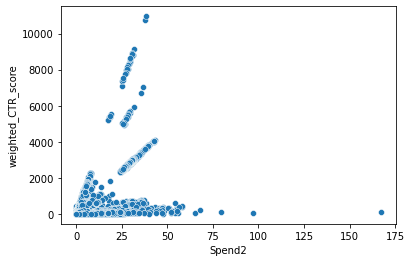

In [154]:
sns.scatterplot(data=creative_cleaned[creative_cleaned['Target_Group'] == 1], 
                x="Spend2", y="weighted_CTR_score")

In [103]:
from datetime import datetime

In [155]:
creative_cleaned['month'] = creative_cleaned['Date'].dt.month
creative_cleaned

,Campaign,ad_format,Clicks,Spend,creative_size,Date,Impressions,Reach,Audience,Platform,...,creative_version,100%_video_views,video_starts,Follows,CTR,CTR_score,weighted_CTR_score,Spend2,Target_Group,month
0,FY22,Single image,0,0.26,No Answer,2022-05-19,119,63.0,1,Facebook,...,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.26,1.0,5
1,FY22,Single image,0,0.15,No Answer,2022-05-19,9,8.0,1,Instagram,...,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.15,1.0,5
2,FY22,Single image,0,0.38,No Answer,2022-05-19,26,17.0,1,Facebook,...,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.38,1.0,5
3,FY22,Single image,0,0.19,No Answer,2022-05-19,12,10.0,1,Instagram,...,NoDTI,0.0,0.0,0.0,0.000000,0.0,0.0,0.19,1.0,5
4,FY22,Single image,1,3.62,No Answer,2022-05-19,247,150.0,1,Facebook,...,EarlyBird,0.0,0.0,0.0,0.004049,0.0,0.0,3.62,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101661,ESPN,TV,0,0.1,No Answer,2022-05-01,3,3.0,General Targetting,OTT,...,15s,0.0,0.0,0.0,0.000000,0.0,0.0,0.10,3.0,5
101662,MTV,TV,0,0.17,No Answer,2022-05-01,5,5.0,General Targetting,OTT,...,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.17,3.0,5
101663,Food Network,TV,0,0.14,No Answer,2022-05-01,4,4.0,General Targetting,OTT,...,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.14,3.0,5
101664,Nat Geo TV,TV,0,0.58,No Answer,2022-05-01,17,16.0,General Targetting,OTT,...,15_QR,0.0,0.0,0.0,0.000000,0.0,0.0,0.58,3.0,5


In [156]:
summary = creative_cleaned.groupby(['month', 'Target_Group'])[['Clicks']].sum().reset_index()
summary

,month,Target_Group,Clicks
0,3,3.0,0
1,4,1.0,493
2,4,2.0,782
3,4,3.0,2931
4,5,1.0,1548
5,5,2.0,4801
6,5,3.0,1917
7,6,1.0,882
8,6,2.0,5055
9,6,3.0,2151


In [157]:
summary2 = creative_cleaned.groupby(['month', 'Target_Group'])[['Spend2']].sum().reset_index()
summary2

,month,Target_Group,Spend2
0,3,3.0,41965.930000
1,4,1.0,7077.032468
2,4,2.0,10712.108922
3,4,3.0,213218.127592
4,5,1.0,22866.503784
5,5,2.0,48142.288165
6,5,3.0,1707.340000
7,6,1.0,10588.731143
8,6,2.0,36270.224384
9,6,3.0,1782.021121


<AxesSubplot:xlabel='month', ylabel='Clicks'>

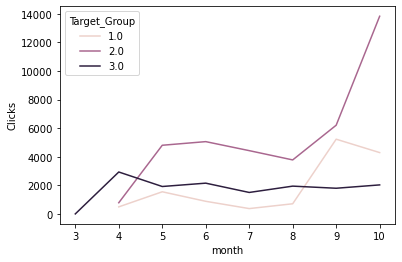

In [158]:
sns.lineplot(x = 'month', y = 'Clicks', hue = 'Target_Group', data = summary, 
                    ci = None)

<AxesSubplot:xlabel='month', ylabel='Spend2'>

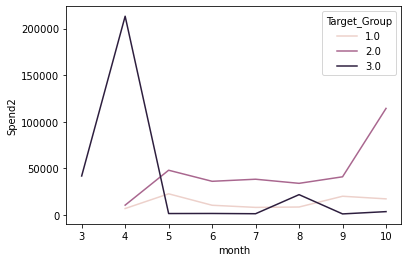

In [159]:
sns.lineplot(x = 'month', y = 'Spend2', hue = 'Target_Group', data = summary2, 
                    ci = None)

In [160]:
video = creative_cleaned[(creative_cleaned['ad_format'] == 'Video') 
                         & (creative_cleaned['100%_video_views'] > 0)]
video

,Campaign,ad_format,Clicks,Spend,creative_size,Date,Impressions,Reach,Audience,Platform,...,creative_version,100%_video_views,video_starts,Follows,CTR,CTR_score,weighted_CTR_score,Spend2,Target_Group,month
13,FY22,Video,0,1.51,No Answer,2022-05-19,72,61.0,1,Facebook,...,Faceoff1,1.0,39.0,0.0,0.000000,0.0,0.0,1.510000,1.0,5
15,FY22,Video,2,3.1,No Answer,2022-05-19,108,84.0,1,Facebook,...,Faceoff2,1.0,77.0,0.0,0.018519,0.0,0.0,3.100000,1.0,5
16,FY22,Video,0,0.74,No Answer,2022-05-19,19,17.0,1,Instagram,...,Faceoff2,1.0,18.0,0.0,0.000000,0.0,0.0,0.740000,1.0,5
19,FY22,Video,0,4.51,No Answer,2022-05-19,144,112.0,1,Facebook,...,Cutdown1B,5.0,114.0,0.0,0.000000,0.0,0.0,4.510000,1.0,5
35,FY22,Video,0,1.7,No Answer,2022-05-19,46,40.0,2,Facebook,...,Cutdown1B,1.0,35.0,0.0,0.000000,0.0,0.0,1.700000,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99005,4 - StackAdapt - Display - Video,Video,0,1900-01-17 01:00:18,1920x1080,2022-10-11,1159,56.0,4,Domain Display,...,Cutdown1B,836.0,1099.0,0.0,0.000000,0.5,579.5,17.041875,2.0,10
99006,4 - StackAdapt - Display - Video,Video,0,1900-01-15 22:20:08,1920x1080,2022-10-11,1084,67.0,4,Domain Display,...,Faceoff,737.0,1006.0,0.0,0.000000,0.5,542.0,15.930648,2.0,10
99065,5 - StackAdapt - Remarketing - Video,Video,0,1900-02-03 22:38:43,1920x1080,2022-10-11,2387,170.0,5,Domain Display,...,Cutdown1A,1035.0,2175.0,0.0,0.000000,0.5,1193.5,34.943553,2.0,10
99066,5 - StackAdapt - Remarketing - Video,Video,0,1900-02-06 15:35:43,1920x1080,2022-10-11,2571,161.0,5,Domain Display,...,Cutdown1B,1722.0,2376.0,0.0,0.000000,0.5,1285.5,37.649803,2.0,10


<AxesSubplot:xlabel='100%_video_views', ylabel='Count'>

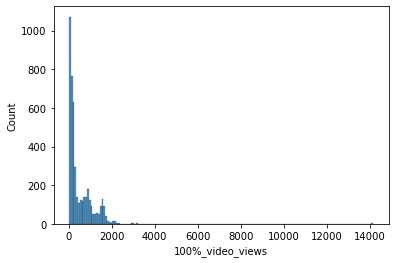

In [161]:
sns.histplot(data=video, x='100%_video_views')

In [162]:
video.groupby('Target_Group')[['100%_video_views']].sum().reset_index()

,Target_Group,100%_video_views
0,1.0,488538.0
1,2.0,1971513.0


In [126]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [163]:
creative1 = creative_cleaned[creative_cleaned['Target_Group'] == 1]
creative2 = creative_cleaned[creative_cleaned['Target_Group'] == 2]
creative3 = creative_cleaned[creative_cleaned['Target_Group'] == 3]

In [164]:
x1 = creative1['Spend2']

y1 = creative1['weighted_CTR_score']

f1 = 'y1 ~ x1'
test1 = ols(f1, data = creative1).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                 2.733e+04
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:23:48   Log-Likelihood:            -3.2654e+05
No. Observations:               45027   AIC:                         6.531e+05
Df Residuals:                   45025   BIC:                         6.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0352      1.737      7.506      0.000       9.631      16.439
x1            51.0987      0.309    165.310      0.000      50.493      51.705
==============================================================================
Omnibus:                    55052.852   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33998409.580
Skew:                           6.046   Prob(JB):                         0.00
Kurtosis:                     137.072   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
x2 = creative2['Spend2']

y2 = creative2['weighted_CTR_score']

f2 = 'y2 ~ x2'
test2 = ols(f2, data = creative2).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                 1.580e+04
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:24:01   Log-Likelihood:            -2.9475e+05
No. Observations:               34913   AIC:                         5.895e+05
Df Residuals:                   34911   BIC:                         5.895e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.9733      6.234     50.845      0.000     304.754     329.192
x2            22.5219      0.179    125.690      0.000      22.171      22.873
==============================================================================
Omnibus:                    71472.975   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        938930173.555
Skew:                          16.610   Prob(JB):                         0.00
Kurtosis:                     805.707   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
x3 = creative3['Spend2']

y3 = creative3['weighted_CTR_score']

f3 = 'y3 ~ x3'
test3 = ols(f3, data = creative3).fit()
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          1.25e-244
Time:                        12:24:09   Log-Likelihood:            -1.6171e+05
No. Observations:               21683   AIC:                         3.234e+05
Df Residuals:                   21681   BIC:                         3.234e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9408      2.912      6.847      0.000      14.233      25.649
x3             1.5371      0.045     33.837      0.000       1.448       1.626
==============================================================================
Omnibus:                    41394.543   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         90196500.153
Skew:                          14.869   Prob(JB):                         0.00
Kurtosis:                     317.564   Cond. No.                         65.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""